In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Load the Dataset

In [8]:
df = pd.read_csv(r"C:\Users\nikit\Pycharm\No_Reference\valid_brisque_results.csv")


In [9]:
df.head()

,Image_Path,BRISQUE_score
0,E:\iNaturalist\test_images\Bellis_perennis_0.jpg,43.718621
1,E:\iNaturalist\test_images\Bellis_perennis_1.JPG,6.560191
2,E:\iNaturalist\test_images\Bellis_perennis_10.JPG,7.297471
3,E:\iNaturalist\test_images\Bellis_perennis_100...,22.822918
4,E:\iNaturalist\test_images\Bellis_perennis_101...,16.819323


In [10]:
df.describe()

,BRISQUE_score
count,305.000000
mean,21.337192
std,12.702760
min,-2.565749
25%,10.889477
50%,18.650715
75%,30.386926
max,63.673948


In [11]:
df.loc[df["BRISQUE_score"] > 50]

,Image_Path,BRISQUE_score
9,E:\iNaturalist\test_images\Bellis_perennis_106...,52.191960
70,E:\iNaturalist\test_images\Bellis_perennis_67.jpg,57.282214
102,E:\iNaturalist\test_images\Bellis_perennis_97.JPG,50.576780
206,E:\iNaturalist\test_images\Matricaria_chamomil...,63.673948
265,E:\iNaturalist\test_images\Matricaria_chamomil...,50.645396


In [12]:
df.loc[df["BRISQUE_score"] < 5]

,Image_Path,BRISQUE_score
12,E:\iNaturalist\test_images\Bellis_perennis_11.jpg,3.992462
29,E:\iNaturalist\test_images\Bellis_perennis_28.jpg,1.031742
34,E:\iNaturalist\test_images\Bellis_perennis_32.jpg,2.900021
49,E:\iNaturalist\test_images\Bellis_perennis_47.jpg,-1.842139
62,E:\iNaturalist\test_images\Bellis_perennis_59.jpg,1.334942
76,E:\iNaturalist\test_images\Bellis_perennis_72.jpg,3.464314
98,E:\iNaturalist\test_images\Bellis_perennis_93.jpg,3.385410
107,E:\iNaturalist\test_images\Leucanthemum_vulgar...,4.408313
110,E:\iNaturalist\test_images\Leucanthemum_vulgar...,0.769653
129,E:\iNaturalist\test_images\Leucanthemum_vulgar...,3.200948


BRISQUE (Blind/Referenceless Image Spatial Quality Evaluator) is a no-reference image quality metric. It assigns a score to an image based on how "natural" its statistics are, compared to undistorted images. The interpretation is straightforward:
- Lower BRISQUE score == Higher (better) image quality
- Higher BRISQUE score == Lower (worse) image quality

As a rule of thumb from the official documentation:
0-30: Good quality
More than 40: Poor quality

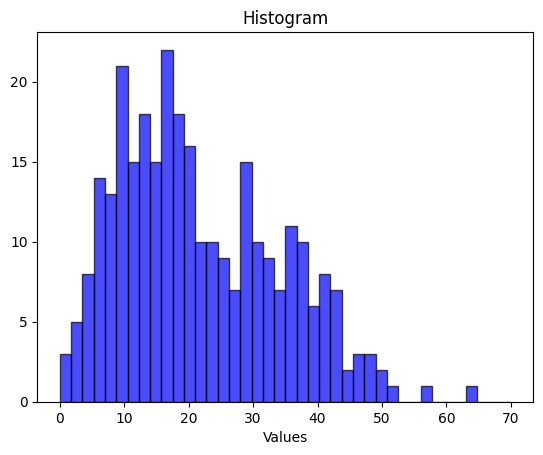

In [13]:
# Create a histogram with density and custom color
plt.hist(df['BRISQUE_score'],bins = 40, color = 'blue', edgecolor='black', alpha=0.7, range=(0,70))
plt.xlabel('Values')
plt.title('Histogram')
plt.show()

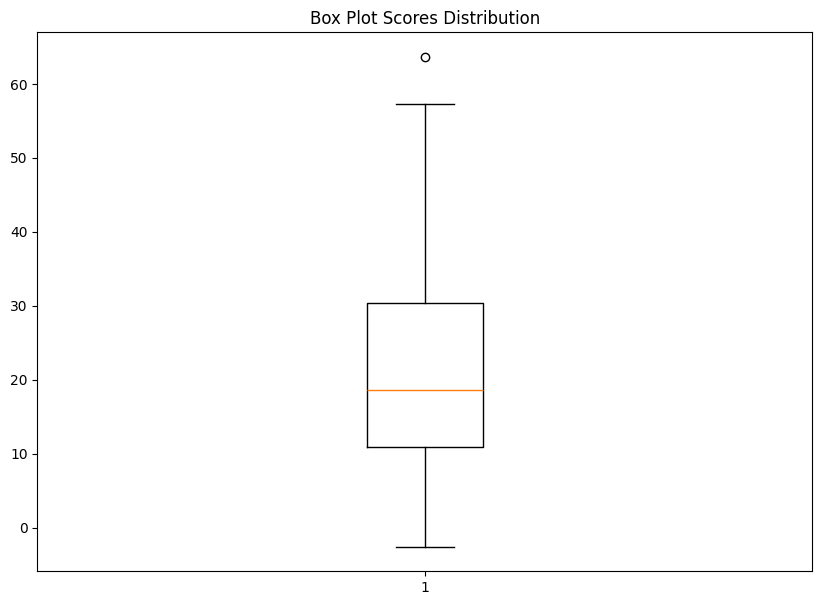

In [14]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(df['BRISQUE_score'])
plt.title('Box Plot Scores Distribution')
plt.show()

In [15]:
q = df['BRISQUE_score'].quantile(0.99)

In [16]:
df = df[df['BRISQUE_score'] < q]

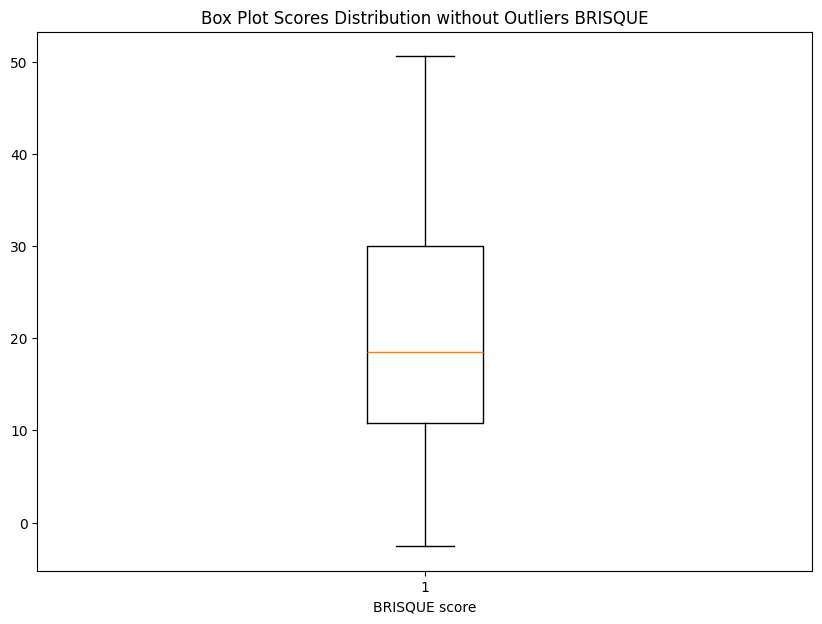

In [17]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(df['BRISQUE_score'])
plt.xlabel('BRISQUE score')
plt.title('Box Plot Scores Distribution without Outliers BRISQUE')
plt.show()

## Setting up the threshold

Based on BRISQUE documentation, images above 30 score can be considered as bad images. Those are the images above my third quarter.
Images above third quartile represent 25% of the worst images in terms of quality, according to my dataset distribution

In [18]:
q3 = df['BRISQUE_score'].quantile(0.75)

df_good_images = df[df['BRISQUE_score'] < q3]
df_bad_images = df[df['BRISQUE_score'] > q3]

In [19]:
df_good_images.describe()

,BRISQUE_score
count,225.000000
mean,15.177256
std,7.671483
min,-2.565749
25%,9.238566
50%,15.477810
75%,20.407219
max,29.874129


In [20]:
df_good_images.loc[df['BRISQUE_score'] < 0]

,Image_Path,BRISQUE_score
49,E:\iNaturalist\test_images\Bellis_perennis_47.jpg,-1.842139
159,E:\iNaturalist\test_images\Leucanthemum_vulgar...,-2.565749
189,E:\iNaturalist\test_images\Leucanthemum_vulgar...,-0.341409
214,E:\iNaturalist\test_images\Matricaria_chamomil...,-2.379884
237,E:\iNaturalist\test_images\Matricaria_chamomil...,-0.940165


## Normalization

Rescale the score with min-max normalization so the minimum becomes 0 and the maximum becomes 1. After that invert the results so the 1 represents best looking images and the 0 represents worse looking images.

In [21]:
scaler = MinMaxScaler()
df_good_images.loc[:,'brisque_norm'] = scaler.fit_transform(df_good_images[['BRISQUE_score']])
df_good_images.loc[:,'brisque_norm_inv'] = 1 - df_good_images.loc[:,'brisque_norm']

C:\Users\nikit\AppData\Local\Temp\ipykernel_14036\226502457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_images.loc[:,'brisque_norm'] = scaler.fit_transform(df_good_images[['BRISQUE_score']])
C:\Users\nikit\AppData\Local\Temp\ipykernel_14036\226502457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_images.loc[:,'brisque_norm_inv'] = 1 - df_good_images.loc[:,'brisque_norm']


In [22]:
df_bad_images.shape

(75, 2)

In [23]:
df_good_images.shape

(225, 4)